## Customer Lifetime Value Calculation

#### CLTV = (CUSTOMER VALUE / CHURN RATE) * PROFIT MARGIN
#### CUSTOMER VALUE = AVERAGE ORDER VALUE * PURCHASE FREQUENCY
#### CHURN RATE (CONSTANT FOR COMPANY) = 1 - REPEAT RATE
#### REPEAT RATE = NUMBER OF CUSTOMER WHO ORDER MORE THAN ONE / TOTAL NUMBER OF CUSTOMERS
#### AVERAGE ORDER VALUE = TOTAL REVENUE / TOTAL TRANSACTION
#### PURCHASE FREQUENCY = TOTAL TRANSACTION / TOTAL NUMBER OF CUSTOMERS
#### PROFIT MARGIN = TOTAL REVENUE / PROFIT RATE



#### An example of calculation the CLTV

The company's and the customer's information are below;

The Company's;
Total Number Of Customers : 100
Churn Rate : 0.8
Profit Rate : 0.1

The Customer's
Total Amount Of Transactions : 1200
Total Number Of Transactions : 3

Calculation of this customer's CLTV:

Average Order Value : 1200 / 3 = 400
Purchase Frequency : 3 / 100 = 0.03
Customer Value : 400 * 0.03 = 12
Profit Margin : 1200 * 0.1 = 120
CLTV : (12 / 0.8) * 120 = 1800 



### Importing Modules & Dataset


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: "%.2f" % x)

In [5]:
data2010 = pd.read_excel("online_retail_II.xlsx", sheet_name="Year 2009-2010")
data2011 = pd.read_excel("online_retail_II.xlsx", sheet_name="Year 2010-2011")

In [6]:
data = data2010.append(data2011)
data.reset_index(drop = True, inplace=True)
df = data.copy()

### Exploratory Data Analysis

### Check Data

In [7]:
def check(df, head = 5):
    print("**********************************HEAD**********************************")
    print(df.head(head))
    print("**********************************TAIL**********************************")
    print(df.tail(head))
    print("**********************************TYPES**********************************")
    print(df.dtypes)
    print("**********************************SHAPE**********************************")
    print(df.shape)
    print("**********************************NA**********************************")
    print(df.isnull().sum())
    print("**********************************QUANTILES**********************************")
    print(df.describe([0, 0.05, 0.5, 0.95]))

In [8]:
check(df)

**********************************HEAD**********************************
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95     13085.00  United Kingdom  
1 2009-12-01 07:45:00   6.75     13085.00  United Kingdom  
2 2009-12-01 07:45:00   6.75     13085.00  United Kingdom  
3 2009-12-01 07:45:00   2.10     13085.00  United Kingdom  
4 2009-12-01 07:45:00   1.25     13085.00  United Kingdom  
**********************************TAIL**********************************
        Invoice StockCode                      Description  Quantity  \
1

### Grab Columns

In [9]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car


In [10]:
cats,nums,cards = grab_col_names(df)

Observations: 1067371
Variables: 8
cat_cols: 0
num_cols: 4
cat_but_car: 4
num_but_cat: 0


In [11]:
def num_summary(df, col, plot=False):
    quantiles = [0.01, 0.05, 0.1, 0.25, 0.50, 0.75, 0.95, 0.99]
    print(df[col].describe(quantiles).T)
    print("*****************************************************")
    if plot:
        df[col].hist()
        plt.xlabel(col)
        plt.title(col)
        plt.show(block=True)
        
        

count   1067371.00
mean          9.94
std         172.71
min      -80995.00
1%           -3.00
5%            1.00
10%           1.00
25%           1.00
50%           3.00
75%          10.00
95%          30.00
99%         100.00
max       80995.00
Name: Quantity, dtype: float64
*****************************************************


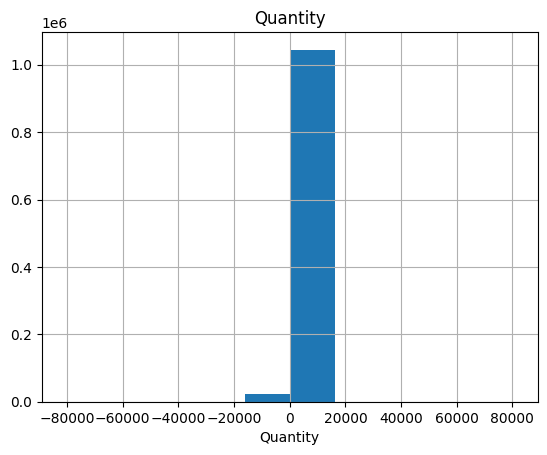

count                 1067371
unique                  47635
top       2010-12-06 16:57:00
freq                     1350
first     2009-12-01 07:45:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object
*****************************************************


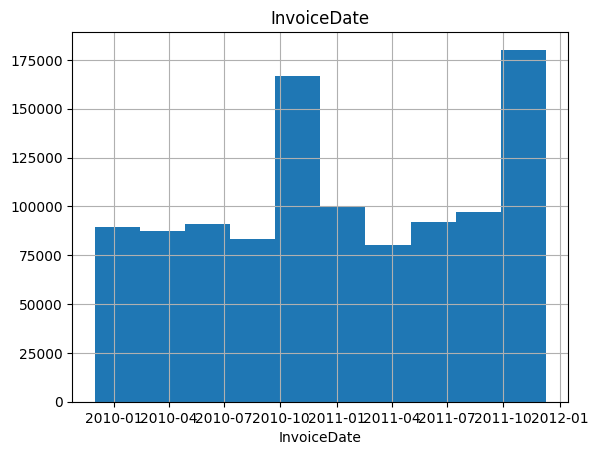

count   1067371.00
mean          4.65
std         123.55
min      -53594.36
1%            0.21
5%            0.42
10%           0.65
25%           1.25
50%           2.10
75%           4.15
95%           9.95
99%          18.00
max       38970.00
Name: Price, dtype: float64
*****************************************************


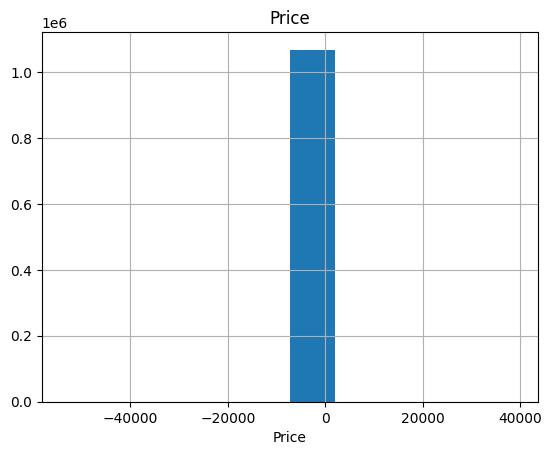

count   824364.00
mean     15324.64
std       1697.46
min      12346.00
1%       12422.00
5%       12681.00
10%      12971.00
25%      13975.00
50%      15255.00
75%      16797.00
95%      17911.00
99%      18207.00
max      18287.00
Name: Customer ID, dtype: float64
*****************************************************


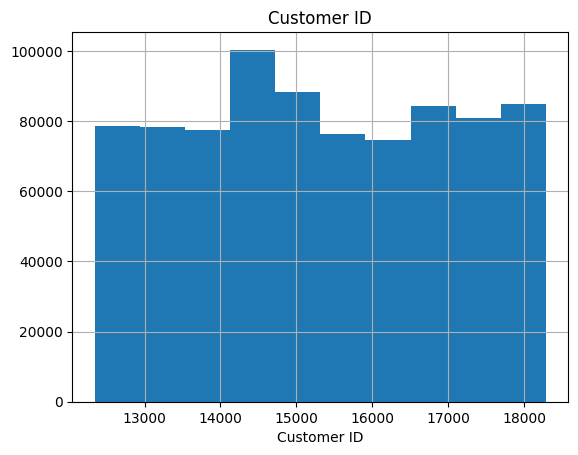

In [13]:
for col in nums:
    num_summary(df,col,plot=True)


### Handling Missing Values


There are missing values in two columns which are Description and Customer ID. The number of missing values in the Description column is not significant amount and the situation of being missing values in the unique Customer ID column can not be accepted, thus we drop these missing values for better analysis.  

In [14]:
data.dropna(inplace=True)

In [15]:
data.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

### Handling Outliers

  There are significantly huge value of outliers in Quantity and Price columns, so we need to fix that problem by measuring IQR and make the data between Q1 - 1.5IQR and Q3 + 1.5IQR.
  We do not take any action about the values in quantity and price which are lower than zero because they may be returned products and/or promoted products and our main target is not analyze the customers intent like in market basket analysis. 

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,824364.00,12.41,188.98,-80995.00,2.00,5.00,12.00,80995.00
Price,824364.00,3.68,70.24,0.00,1.25,1.95,3.75,38970.00
Customer ID,824364.00,15324.64,1697.46,12346.00,13975.00,15255.00,16797.00,18287.00


In [17]:
IQR_quantity = (data.Quantity.quantile(0.75) - data.Quantity.quantile(0.25)) * 1.5
IQR_price = (data.Price.quantile(0.75) - data.Price.quantile(0.25)) * 1.5

In [20]:
quantity_lower_limit = data.Quantity.quantile(0.25) - IQR_quantity
quantity_upper_limit = data.Quantity.quantile(0.75) + IQR_quantity
price_lower_limit = data.Price.quantile(0.25) - IQR_price
price_upper_limit = data.Price.quantile(0.75) + IQR_price

In [21]:
data = data[(data.Quantity > quantity_lower_limit) & (data.Quantity < quantity_upper_limit)
           & (data.Price > price_lower_limit) & (data.Price < price_upper_limit)]

count   683318.00
mean         7.19
std          6.83
min        -12.00
1%          -2.00
5%           1.00
10%          1.00
25%          2.00
50%          5.00
75%         12.00
95%         24.00
99%         25.00
max         26.00
Name: Quantity, dtype: float64
*****************************************************


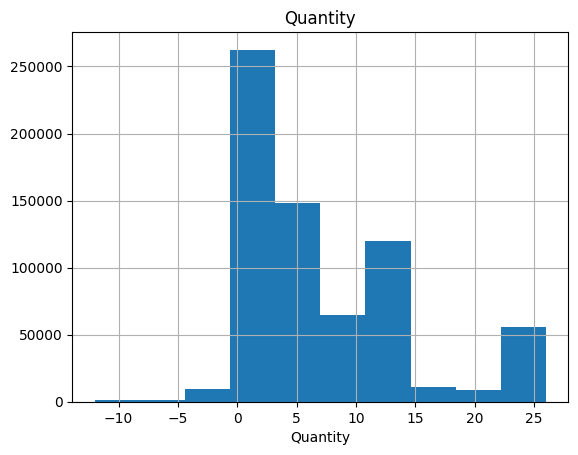

count                  683318
unique                  35986
top       2011-11-14 15:27:00
freq                      429
first     2009-12-01 07:45:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object
*****************************************************


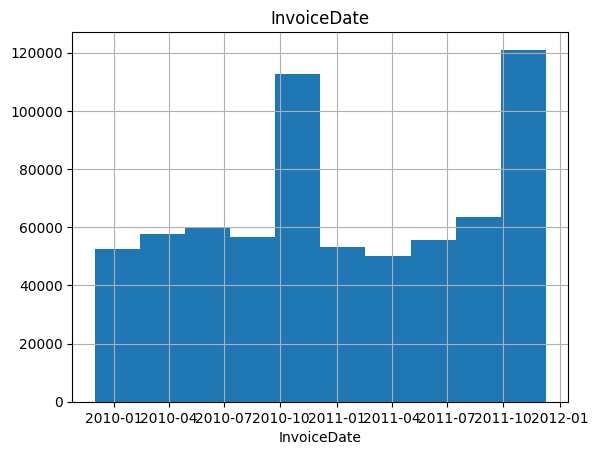

count   683318.00
mean         2.17
std          1.45
min          0.00
1%           0.29
5%           0.42
10%          0.55
25%          1.25
50%          1.65
75%          2.95
95%          4.95
99%          5.95
max          6.67
Name: Price, dtype: float64
*****************************************************


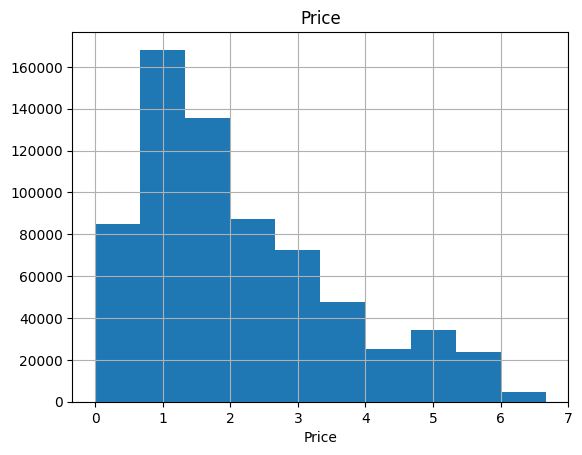

count   683318.00
mean     15356.48
std       1696.78
min      12346.00
1%       12429.00
5%       12683.00
10%      13001.00
25%      14001.00
50%      15311.00
75%      16835.00
95%      17913.00
99%      18210.00
max      18287.00
Name: Customer ID, dtype: float64
*****************************************************


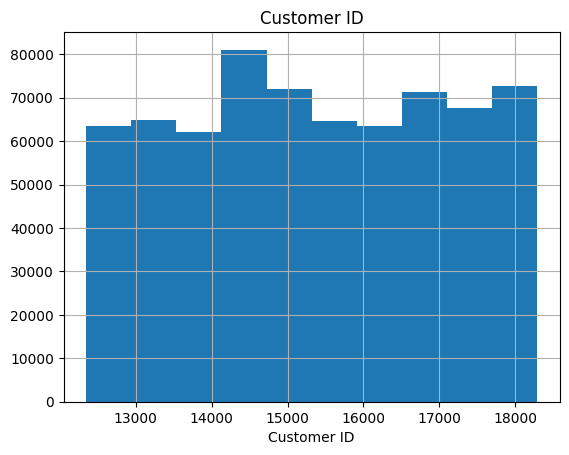

In [22]:
for col in nums:
    num_summary(data,col,True)

### Data Preprocessing & Analyzing

In [24]:
#Creating new column
df["TotalPrice"] = df["Quantity"] * df["Price"]

In [25]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00


In [26]:
#Calculation of the metrics
cltv_c = df.groupby('Customer ID').agg({'Invoice': lambda x: x.nunique(),
                                        'Quantity': lambda x: x.sum(),
                                        'TotalPrice': lambda x: x.sum()})

cltv_c.columns = ['total_transaction', 'total_unit', 'total_price']

In [27]:
cltv_c.head()

,total_transaction,total_unit,total_price
Customer ID,,,
12346.00,17,52,-64.68
12347.00,8,3286,5633.32
12348.00,5,2714,2019.40
12349.00,5,1619,4404.54
12350.00,1,197,334.40


In [28]:
#Average Order Value
cltv_c["average_order_value"] = cltv_c["total_price"] / cltv_c["total_transaction"]

In [29]:
#Purchase Frequency
cltv_c["purchase_frequency"] = cltv_c["total_transaction"] / cltv_c.shape[0]

In [30]:
#Repeat Rate
repeat_rate = cltv_c[cltv_c["total_transaction"] > 1].shape[0] / cltv_c.shape[0]

churn_rate = 1 - repeat_rate

In [31]:
#Profit Margin
cltv_c['profit_margin'] = cltv_c['total_price'] * 0.10

In [32]:
#Customer Value
cltv_c['customer_value'] = cltv_c['average_order_value'] * cltv_c["purchase_frequency"]

In [33]:
#Customer Lifetime Value

cltv_c["cltv"] = (cltv_c["customer_value"] / churn_rate) * cltv_c["profit_margin"]

cltv_c.sort_values(by="cltv", ascending=False).head()

,total_transaction,total_unit,total_price,average_order_value,purchase_frequency,profit_margin,customer_value,cltv
Customer ID,,,,,,,,
18102.00,153,187110,598215.22,3909.90,0.03,59821.52,100.68,24494281.28
14646.00,164,365220,523342.07,3191.11,0.03,52334.21,88.08,18746538.14
14156.00,202,163910,296564.69,1468.14,0.03,29656.47,49.91,6019891.54
14911.00,510,143741,270248.53,529.90,0.09,27024.85,45.48,4998923.20
17450.00,61,81644,233579.39,3829.17,0.01,23357.94,39.31,3734382.71


In [34]:
#Creating Segments
cltv_c["segment"] = pd.qcut(cltv_c["cltv"], 4, labels=["D", "C", "B", "A"])

In [35]:
cltv_c.sort_values(by="cltv", ascending=False).head()

,total_transaction,total_unit,total_price,average_order_value,purchase_frequency,profit_margin,customer_value,cltv,segment
Customer ID,,,,,,,,,
18102.00,153,187110,598215.22,3909.90,0.03,59821.52,100.68,24494281.28,A
14646.00,164,365220,523342.07,3191.11,0.03,52334.21,88.08,18746538.14,A
14156.00,202,163910,296564.69,1468.14,0.03,29656.47,49.91,6019891.54,A
14911.00,510,143741,270248.53,529.90,0.09,27024.85,45.48,4998923.20,A
17450.00,61,81644,233579.39,3829.17,0.01,23357.94,39.31,3734382.71,A


In [36]:
#Insigts by segments

cltv_c.groupby("segment").agg({"count", "mean", "sum"})

total_transaction              total_unit                total_price  \
                     mean    sum count       mean      sum count        mean   
segment                                                                        
D                    1.51   2249  1486     126.36   187776  1486      175.33   
C                    2.77   4114  1485     328.28   487496  1485      546.43   
B                    5.64   8377  1485     850.71  1263309  1485     1374.22   
A                   20.28  30136  1486    5582.47  8295547  1486     9108.74   

                          average_order_value                  \
                sum count                mean       sum count   
segment                                                         
D         260544.43  1486              139.24 206907.68  1486   
C         811445.50  1485              258.93 384514.70  1485   
B        2040719.01  1485              325.17 482875.06  1485   
A       13535583.44  1486              449.36 667752.26  1486   

        purchase_frequency            profit_margin                   \
                      mean  sum count          mean        sum count   
segment                                                                
D                     0.00 0.38  1486         17.53   26054.44  1486   
C                     0.00 0.69  1485         54.64   81144.55  1485   
B                     0.00 1.41  1485        137.42  204071.90  1485   
A                     0.00 5.07  1486        910.87 1353558.34  1486   

        customer_value                   cltv                    
                  mean     sum count     mean         sum count  
segment                                                          
D                 0.03   43.85  1486     2.75     4093.69  1486  
C                 0.09  136.56  1485    22.76    33793.23  1485  
B                 0.23  343.44  1485   142.20   211172.18  1485  
A                 1.53 2277.95  1486 55416.08 82348291.03  1486

### Functionalize The Processes

In [39]:
def create_cltv_c(dataframe, profit=0.10):

    # Data Preparation
    dataframe.dropna(inplace=True)
    dataframe["TotalPrice"] = dataframe["Quantity"] * dataframe["Price"]
    cltv_c = dataframe.groupby('Customer ID').agg({'Invoice': lambda x: x.nunique(),
                                                   'Quantity': lambda x: x.sum(),
                                                   'TotalPrice': lambda x: x.sum()})
    cltv_c.columns = ['total_transaction', 'total_unit', 'total_price']
    # avg_order_value
    cltv_c['avg_order_value'] = cltv_c['total_price'] / cltv_c['total_transaction']
    # purchase_frequency
    cltv_c["purchase_frequency"] = cltv_c['total_transaction'] / cltv_c.shape[0]
    # repeat rate & churn rate
    repeat_rate = cltv_c[cltv_c.total_transaction > 1].shape[0] / cltv_c.shape[0]
    churn_rate = 1 - repeat_rate
    # profit_margin
    cltv_c['profit_margin'] = cltv_c['total_price'] * profit
    # Customer Value
    cltv_c['customer_value'] = (cltv_c['avg_order_value'] * cltv_c["purchase_frequency"])
    # Customer Lifetime Value
    cltv_c['cltv'] = (cltv_c['customer_value'] / churn_rate) * cltv_c['profit_margin']
    # Segment
    cltv_c["segment"] = pd.qcut(cltv_c["cltv"], 4, labels=["D", "C", "B", "A"])

    return cltv_c

In [37]:
df_ = data.copy()

In [40]:
clv = create_cltv_c(df_)

In [ ]:
clv